In [57]:
import pandas as pd
import numpy as np
# from sklearn.
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
data = pd.read_csv('./spotify.csv', na_values=['', ' ', '-'])

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    object 
 1   released_year         953 non-null    int64  
 2   in_spotify_playlists  953 non-null    int64  
 3   in_spotify_charts     951 non-null    float64
 4   streams               953 non-null    int64  
 5   in_apple_playlists    953 non-null    int64  
 6   in_apple_charts       951 non-null    float64
 7   bpm                   953 non-null    int64  
 8   mode                  953 non-null    object 
 9   energy                953 non-null    int64  
 10  instrumentalness      953 non-null    int64  
 11  liveness              953 non-null    int64  
 12  speechiness           953 non-null    int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 96.9+ KB
None


In [59]:
data = data[data['in_spotify_charts'].isnull() == False].reset_index(drop=True)
data = data[data['in_apple_charts'].isnull() == False].reset_index(drop=True)

data.drop(columns='track_name', inplace=True)

# data['mode'].unique()
data['mode'] = data['mode'].map({'Major': 1, 'Minor': 0})

# Because those songs that are not even on apple/spotify charts are marked as 0, it will break clusterization, solution is to assign them the maximum value (worst songs on the list)
# data.loc[data['in_apple_charts'] == 0] = data['in_apple_charts'].max() # WARNING: This will change all rows!
data.loc[data['in_apple_charts'] == 0, 'in_apple_charts'] = data['in_apple_charts'].max()

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949 entries, 0 to 948
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   released_year         949 non-null    int64  
 1   in_spotify_playlists  949 non-null    int64  
 2   in_spotify_charts     949 non-null    float64
 3   streams               949 non-null    int64  
 4   in_apple_playlists    949 non-null    int64  
 5   in_apple_charts       949 non-null    float64
 6   bpm                   949 non-null    int64  
 7   mode                  949 non-null    int64  
 8   energy                949 non-null    int64  
 9   instrumentalness      949 non-null    int64  
 10  liveness              949 non-null    int64  
 11  speechiness           949 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 89.1 KB


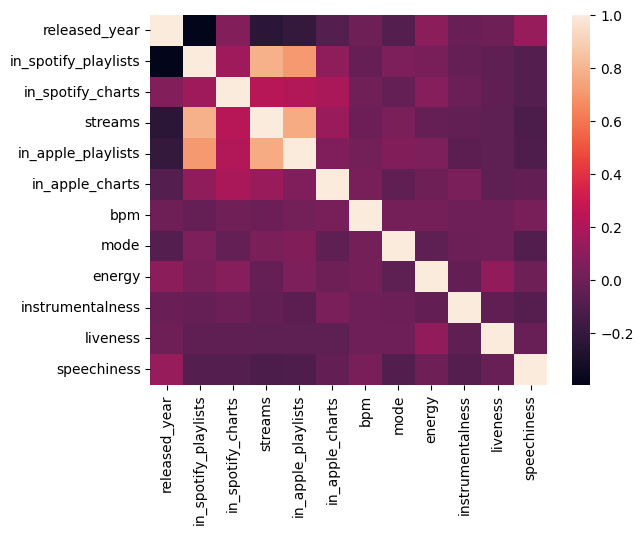

In [63]:
sns.heatmap(data.corr())
plt.show()

In [ ]:
# streams, in_apple_playlists i in_spotify_playlists su međusobno jako povezani (ako pesma ima puno streamova, skoro sigurno ima i puno dodavanja na plejlistama).
# Ako sve ostaviš, algoritam će „duplirati“ (ili čak „utrostručiti“) značaj tih varijabli i klasterizacija neće biti fer – grupisaće pesme uglavnom po tome, ignorišući druge osobine.